ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.



There is an example notebook for assignment one here

 https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynbLinks to an external site.

Imputation Methods for Missing Data
https://www.youtube.com/watch?v=fYhr8eF1uboLinks to an external site.

Nice EDA notebook https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-pythonLinks to an external site.

AutoML_Assingment_Analysis_Pipeline-1.png

Scoring Rubric

Data-Supported Answers (20 Points)

1. Are your answers substantiated with relevant data?
2. You should include tables, graphs, and charts to support your evaluation/answers.

Google Colab Compatibility (5 Points)

1.Ensure your project is compatible with Google Colab.
2.Save and submit the Google Colab notebook as a .ipynb file on Canvas.

Selection and Approval of Public Dataset (5 Points)

1.Choose a public dataset suitable for Regression or Classification.
2.Obtain approval for your chosen dataset from the TAs.

Code Originality and Citation (5 Points)

1.Clearly distinguish between your original code and any adapted sources.
2.Failure to appropriately cite any code will result in zero points for this section.

Code Explanation and Professional (20 Points)

1.Your explanation of the code should be clear and concise during the code review.
2.Also make sure to include explanation in the notebook as well.
3.The clarity of your code review will be evaluated and scaled from 0 to 10 for scoring.

Licensing Clarification (5 Points)

1.Clearly state and cite the license under which your work is released.
2.Neglecting to cite a clear license will lead to zero points for this section.

Comprehensive Answers to Key Questions (40 Points)

1.Answer all the questions thoroughly which are mentioned in the requirements of the assignment.



Note: 80% of the grade will be whether the submission meets the requirements of the assignment and 20% of the assignment will depend upon how good you are able to explain the code and for professionalism.



Notes:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013)Links to an external site.. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

#Abstract
The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information.
 The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset
• Which independent variables are useful to predict a target (dependent variable)?
• Which independent variables have missing data? How much
• Do the training and test sets have the same data?
• In the predictor variables independent of all the other predictor variables?
• Which predictor variables are the most important?
• Do the ranges of the predictor variables make sense?
• What are the distributions of the predictor variables?
Overall, the data looks clean and there are no missing and inconsistent values. The significance of the predictors is investigated and it appears that all independent variables are significant except one, these results can be used to further optimize the model for predicting abalone's age and give better predictions

Data Set
The data set consists of :
Rented Bike Count - Dependent Variable
Date,	Hour,	Temperature(°C),	Humidity(%),	Wind speed (m/s),	Visibility (10m),	Dew point temperature(°C),	Solar Radiation (MJ/m2),	Rainfall(mm),	Snowfall (cm),	Seasons,	Holiday,	Functioning Day - Independent variable

There are a total of 8760 observations.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import chardet

with open('/content/drive/MyDrive/SeoulBikeData.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

data = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding=encoding)

Getting uft-8 encoding error hence used chardet which can detect the encoding of a given text or binary data. It is used where encoding is unknown or ambiguous. Charset probes, Langujage model analysis, Character frequency analysis.

In [3]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
#Check if data is null
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

<Figure size 800x500 with 0 Axes>

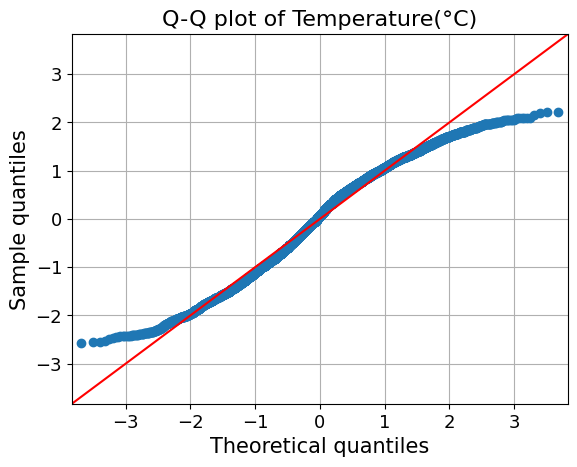

<Figure size 800x500 with 0 Axes>

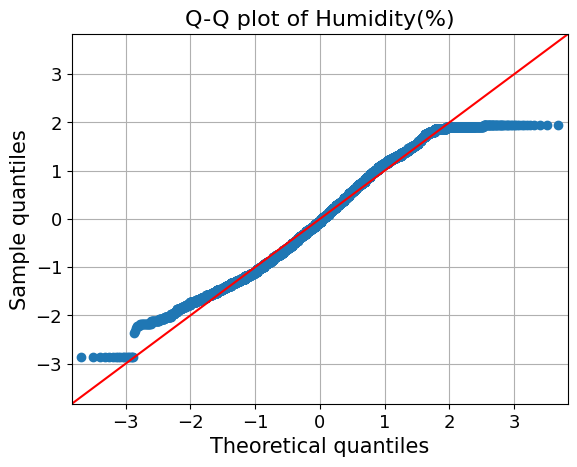

<Figure size 800x500 with 0 Axes>

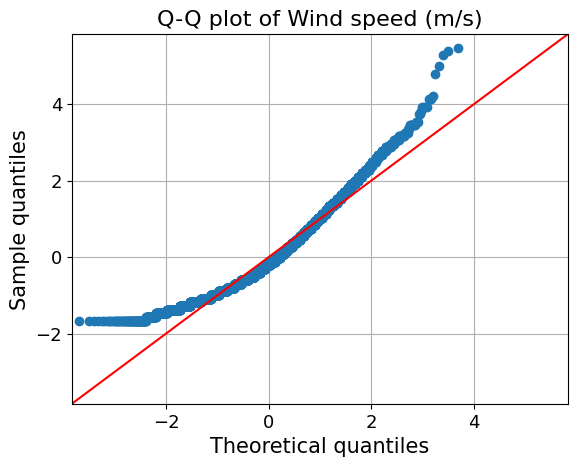

<Figure size 800x500 with 0 Axes>

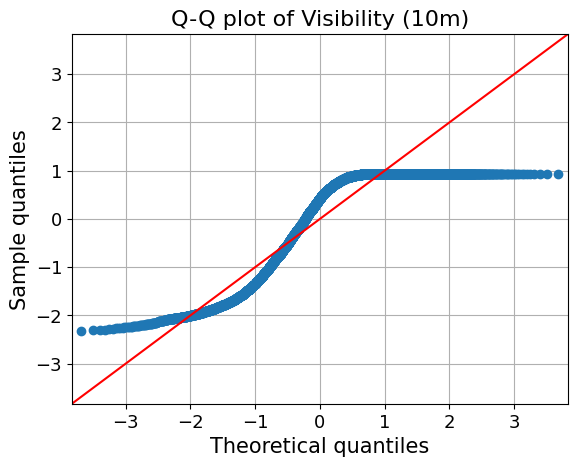

<Figure size 800x500 with 0 Axes>

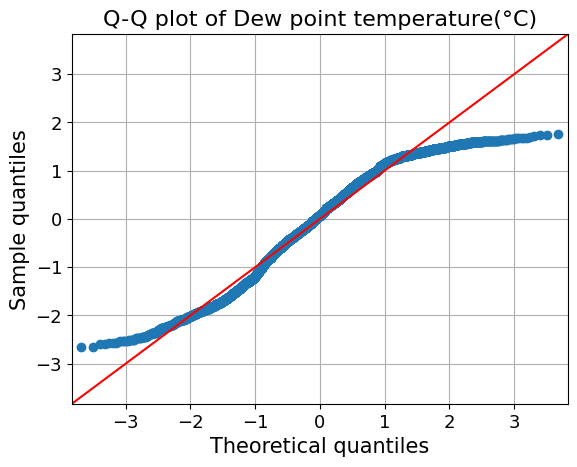

<Figure size 800x500 with 0 Axes>

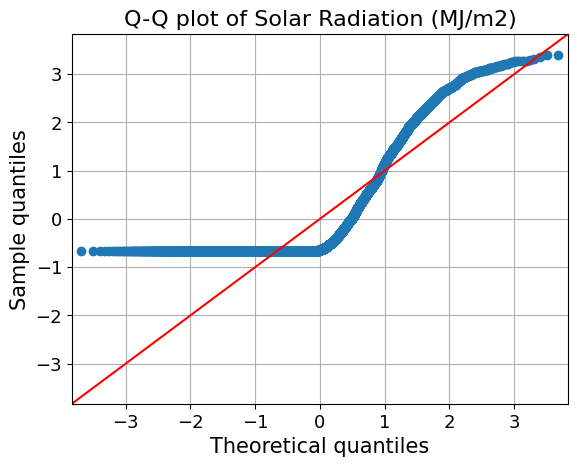

<Figure size 800x500 with 0 Axes>

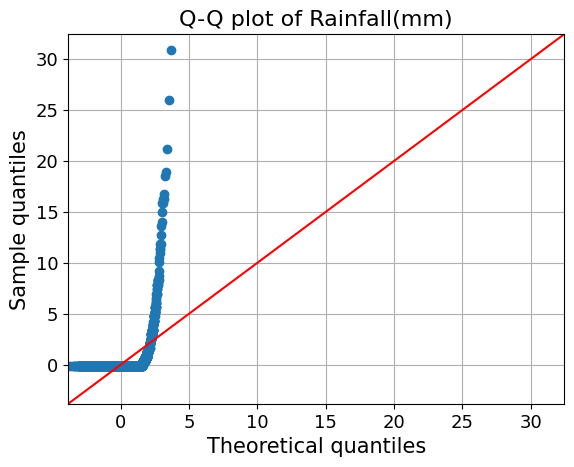

<Figure size 800x500 with 0 Axes>

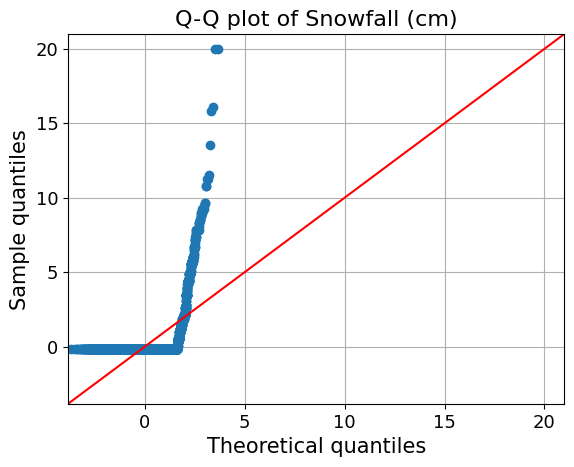

In [ ]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = data[
    ["Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"]
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

Above Q-Q plot shows almost all the independent variables are following normal distribution except rainfall and snowfall.
An S-shaped curve in the Q-Q plot may indicate skewness in the data.

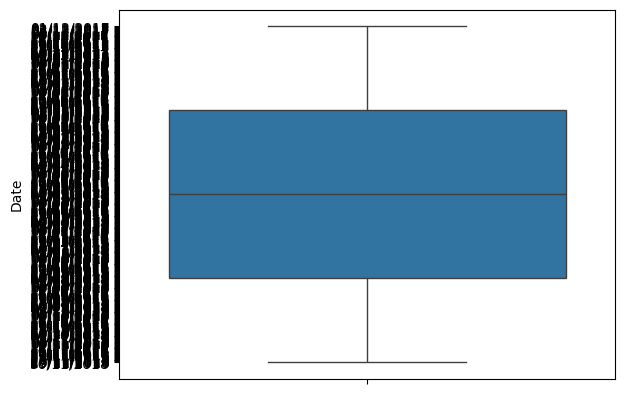

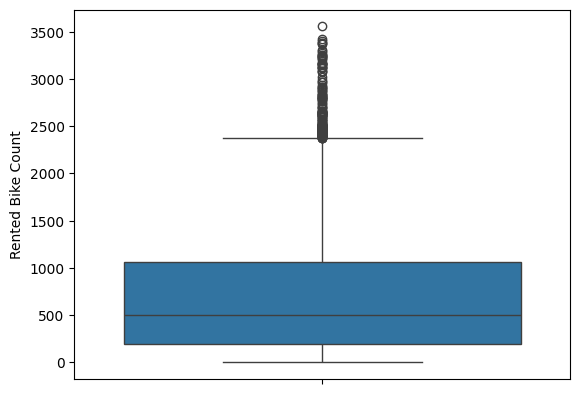

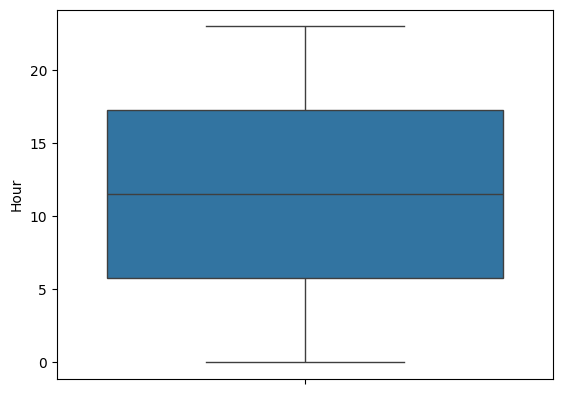

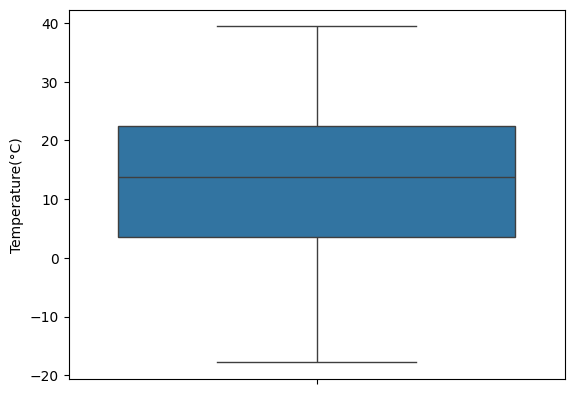

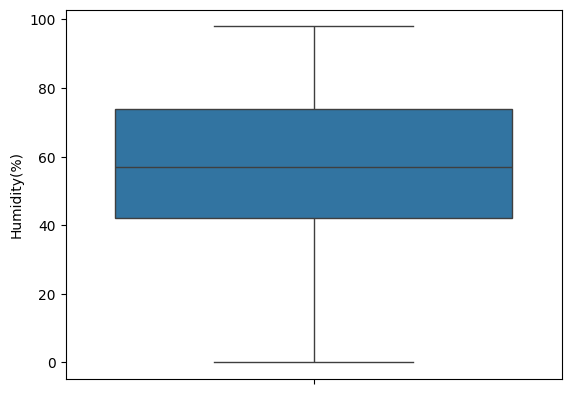

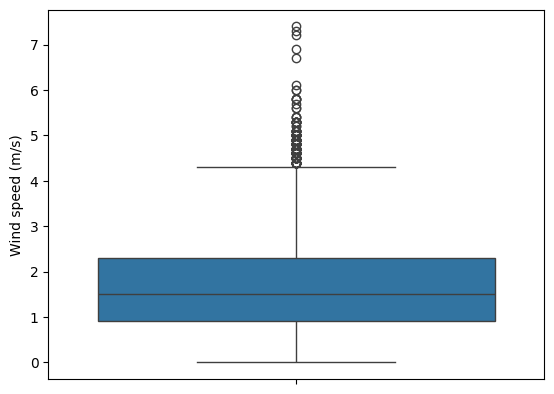

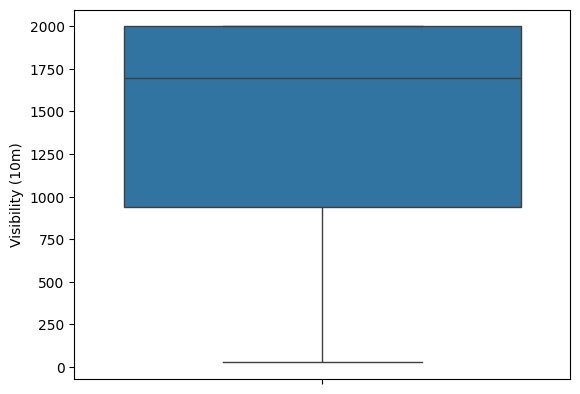

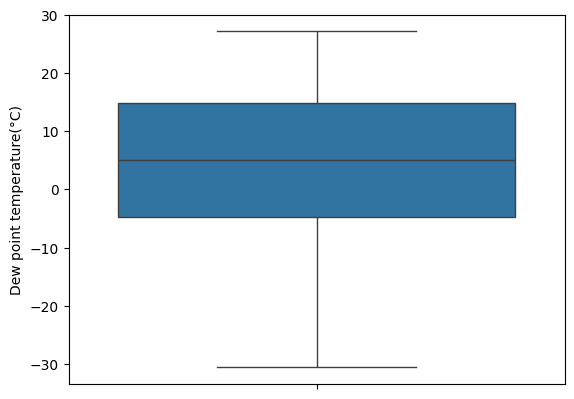

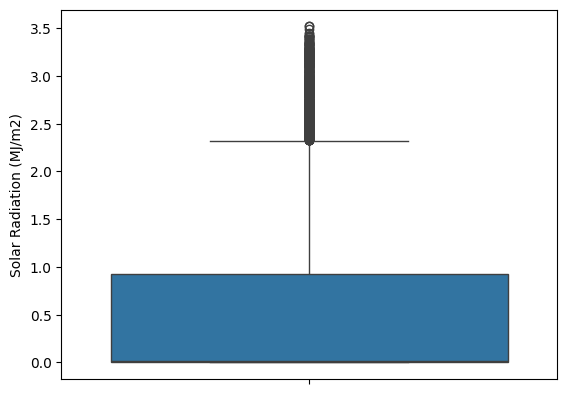

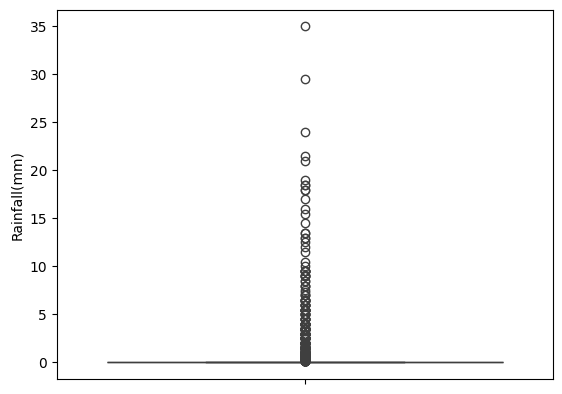

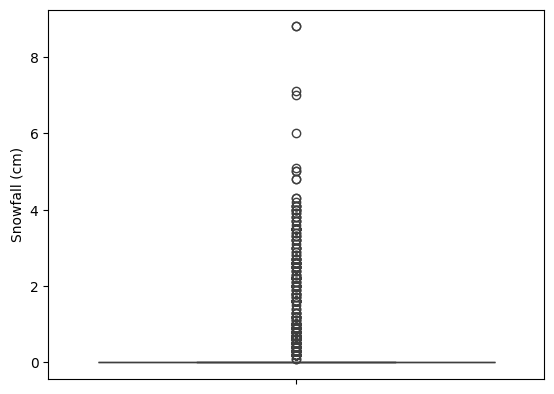

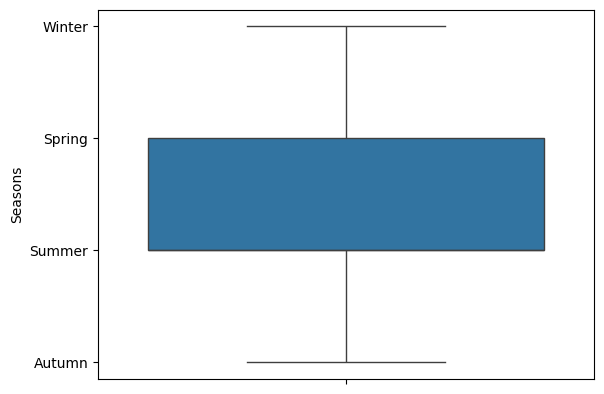

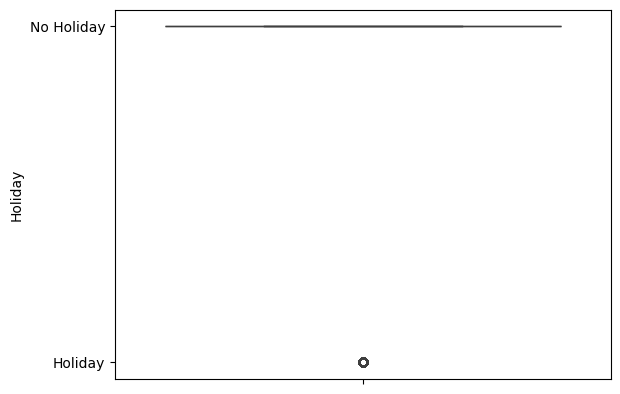

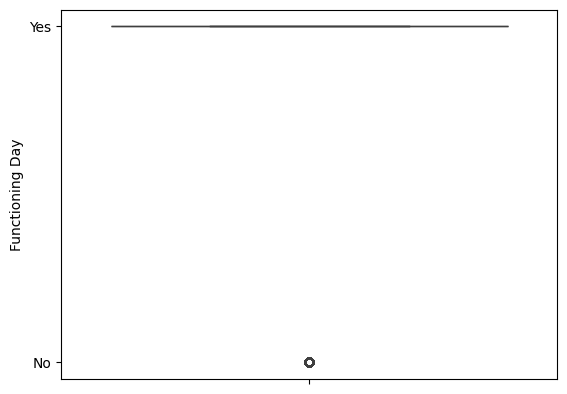

In [5]:
# Checking the Ranges of the predictor variables and dependent variable
#plt.figure(figsize=(20, 7))
#sns.boxplot(data=data)

for column in data.columns:
    plt.figure()
    sns.boxplot(y=data[column])
    plt.show()

As per above plot we can conclude below points

Variables:

X-axis: This displays the different factors that might influence rented bike count. These include hour, temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, and snowfall.

Y-axis: This shows the number of bikes rented, ranging from 0 to 3500.
Data points:

The boxplot doesn't reveal the exact number of data points, but it likely represents a sizable dataset considering the range of values on the y-axis.

Distribution:

The distribution of rented bike count appears somewhat skewed to the right. This means there are more data points towards the lower end of the y-axis, with a smaller tail extending towards higher bike counts.

Outliers:

There are a few outliers present, represented by individual points beyond the whiskers of the boxplots. These outliers indicate instances where the rented bike count was significantly higher or lower than the typical range for a given factor.

Groups:

The boxplot compares rented bike count across different levels of each factor on the x-axis. Each factor essentially acts as a separate group, allowing us to see how rented bike count varies according to each variable.

Key takeaways:

Hour, temperature, and humidity seem to have the most influence on rented bike count, as their boxplots exhibit the widest ranges and tend to be less squished together compared to other factors.
Higher rented bike counts are generally associated with warmer temperatures, lower humidity, and specific hours of the day, potentially corresponding to peak leisure times.
Rainfall and snowfall appear to have a negative impact on rented bike count, as their boxplots are skewed towards the lower end of the y-axis.
The presence of outliers suggests that there can be unexpected fluctuations in rented bike count even under similar conditions.

#Data transforming, Feature creation and Analysis

Tried below normalisation techniques



#1)Correlation Technique worked

Techniques that did not worked.
#1)Feature Importance
To assess the importance of different features, you can train a machine learning model (e.g., random forest) and then use the feature importance attribute. Here's an example using scikit-learn:

from sklearn.ensemble import RandomForestRegressor

# 'Rented Bike Count' target variable
X = data.drop('Rented Bike Count', axis=1)  # Assuming 'target' is the name of your target variable
y = data['Rented Bike Count']
# Initialize the model
model = RandomForestRegressor()
data['Season'] = pd.Categorical(data['Season'])
# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_
print(feature_importances)

#####Creating binary vaiables
from sklearn.preprocessing import StandardScaler

data = pd.get_dummies(data)

##### Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

#2)Percentile Normalization:
####x_scaled = x.rank(pct=True)
#3)Standardization (Z-Score Normalization):
Transforms values to have a mean of 0 and a standard deviation of 1. Which is less sensitive to outliers than Min-Max scaling.

Transforms values into their percentile ranks within the dataset.

from sklearn import preprocessing

##### Create x to store scaled values as floats
x = data[["Rented Bike Count"]].values.astype(float)

##### Create a StandardScaler object
scaler = StandardScaler()

##### Fit the scaler to the data (learns mean and standard deviation)
scaler.fit(x)

##### Transform the data using the learned parameters
####x_scaled = scaler.transform(x)


##### Replace the original column with the normalized values
data[["Rented Bike Count"]] = pd.DataFrame(x_scaled, columns=["Rented Bike Count"])

##### Optional: Visualize the normalized data
data.hist()  # Histogram to check distribution
data.boxplot()

#Correlation Analysis

In [ ]:
# checking the correlation between all the features in the data
data.corr()

<ipython-input-17-38a63e203d79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(°C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Visibility (10m)                    0.199280  0.098753         0.034794   
Dew point temperature(°C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Hour                           0.008715      -0.021516  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

<ipython-input-18-0d33ea995755>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")


<Axes: >

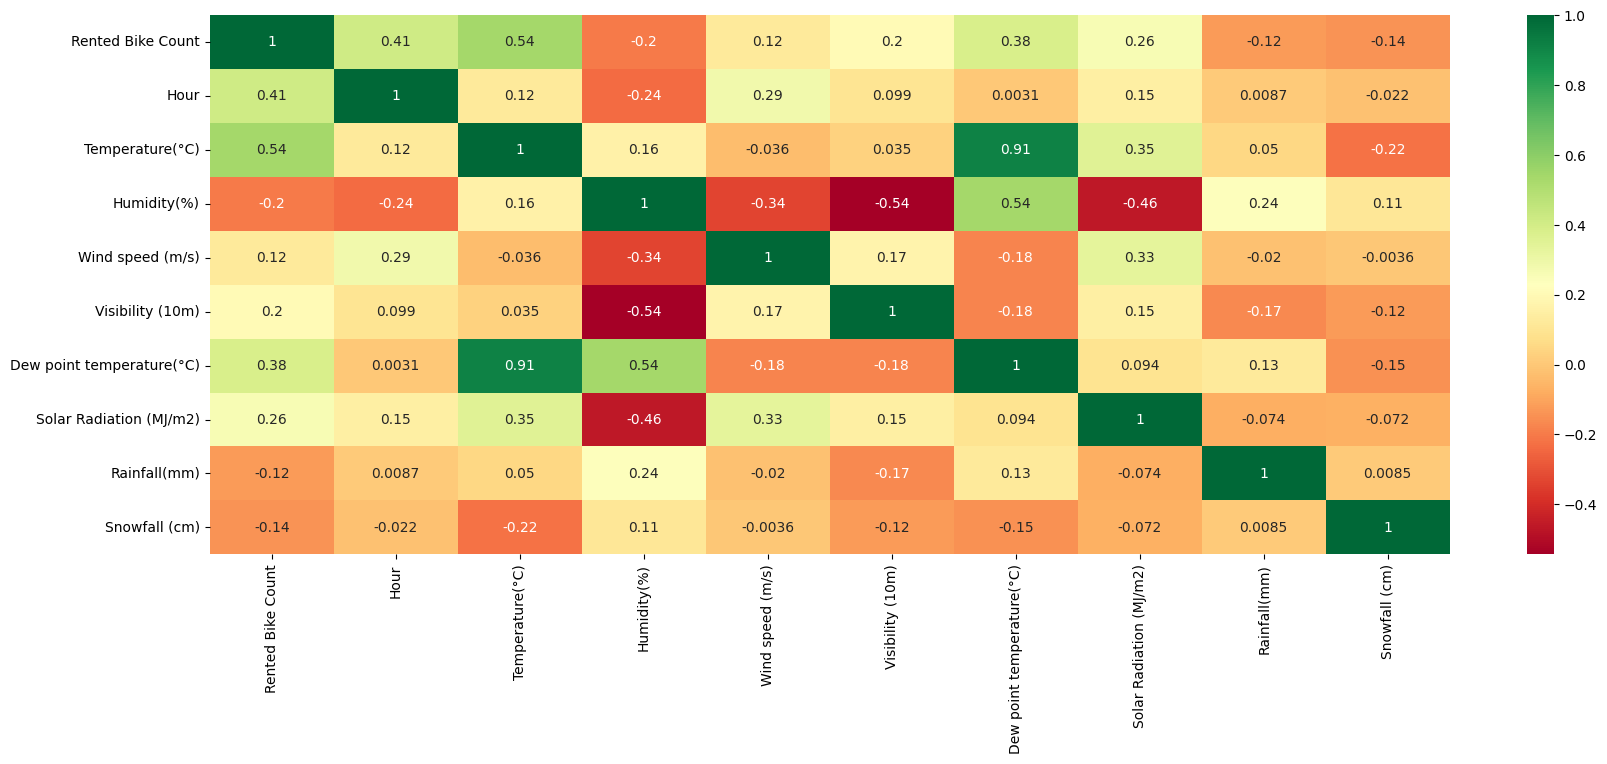

In [ ]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

Strongest Correlations:

Rented Bike Count: - Positively correlated with Temperature(°C) (0.538), indicating a tendency for higher bike rentals during warmer temperatures. - Moderately correlated with Hour (0.410), suggesting a relationship with time of day, potentially peak hours for bike usage.
Other Notable Correlations:

Temperature(°C): - Strongly correlated with Dew point temperature(°C) (0.913), reflecting their close relationship in measuring atmospheric moisture.
Humidity(%): - Negatively correlated with Wind speed (m/s) (-0.337) and Visibility (10m) (-0.543), suggesting that higher humidity often accompanies calmer winds and reduced visibility.
Solar Radiation (MJ/m2): - Negatively correlated with Humidity(%) (-0.462), potentially indicating that cloudy or humid conditions can reduce solar radiation.
Insights for Modeling and Prediction:

Feature Selection: The strong correlations between "Rented Bike Count" and "Temperature(°C)", "Hour", and potentially "Dew point temperature(°C)" suggest these variables could be useful predictors in a model for bike rental demand.
Multicollinearity: The high correlation between "Temperature(°C)" and "Dew point temperature(°C)" might require addressing multicollinearity if both are included in a model, as they might provide redundant information.

#Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
# Prepare the data

non_numeric_columns = ['Date', 'Seasons', 'Holiday', 'Functioning Day']  # List of non-numeric columns
for col in non_numeric_columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Prepare the data
X = data.drop('Solar Radiation (MJ/m2)', axis=1)  # Independent variables
y = data['Rented Bike Count']  # Target variable

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Access the feature importance
feature_importance = model.feature_importances_
print(feature_importance)

[1.00048858e-06 9.99987032e-01 2.17062614e-07 2.93964298e-06
 2.54948339e-06 3.42978591e-06 1.42644345e-06 7.91636198e-07
 2.72388641e-09 1.78440713e-10 5.92964573e-07 3.21096776e-09
 1.44048976e-08]


Features with higher importance values are more influential in making predictions.
We can conclude that hour and temperature are most important parameters.

#Univariate Selection:

In [23]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import LabelEncoder
# Prepare the data

non_numeric_columns = ['Date', 'Seasons', 'Holiday', 'Functioning Day']  # List of non-numeric columns
for col in non_numeric_columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Prepare the data
X = data[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]  # Independent variables
y = data['Rented Bike Count']  # Target variable

# Select the top k features
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
print(X_new)

[[-5.200e+00  3.700e+01  2.000e+03 -1.760e+01  0.000e+00]
 [-5.500e+00  3.800e+01  2.000e+03 -1.760e+01  0.000e+00]
 [-6.000e+00  3.900e+01  2.000e+03 -1.770e+01  0.000e+00]
 ...
 [ 2.600e+00  3.900e+01  1.968e+03 -9.900e+00  0.000e+00]
 [ 2.100e+00  4.100e+01  1.859e+03 -9.800e+00  0.000e+00]
 [ 1.900e+00  4.300e+01  1.909e+03 -9.300e+00  0.000e+00]]


The output of the code shows the transformed feature matrix (X_new) with the top 5 features. The values in the matrix are the transformed feature values, not the original values

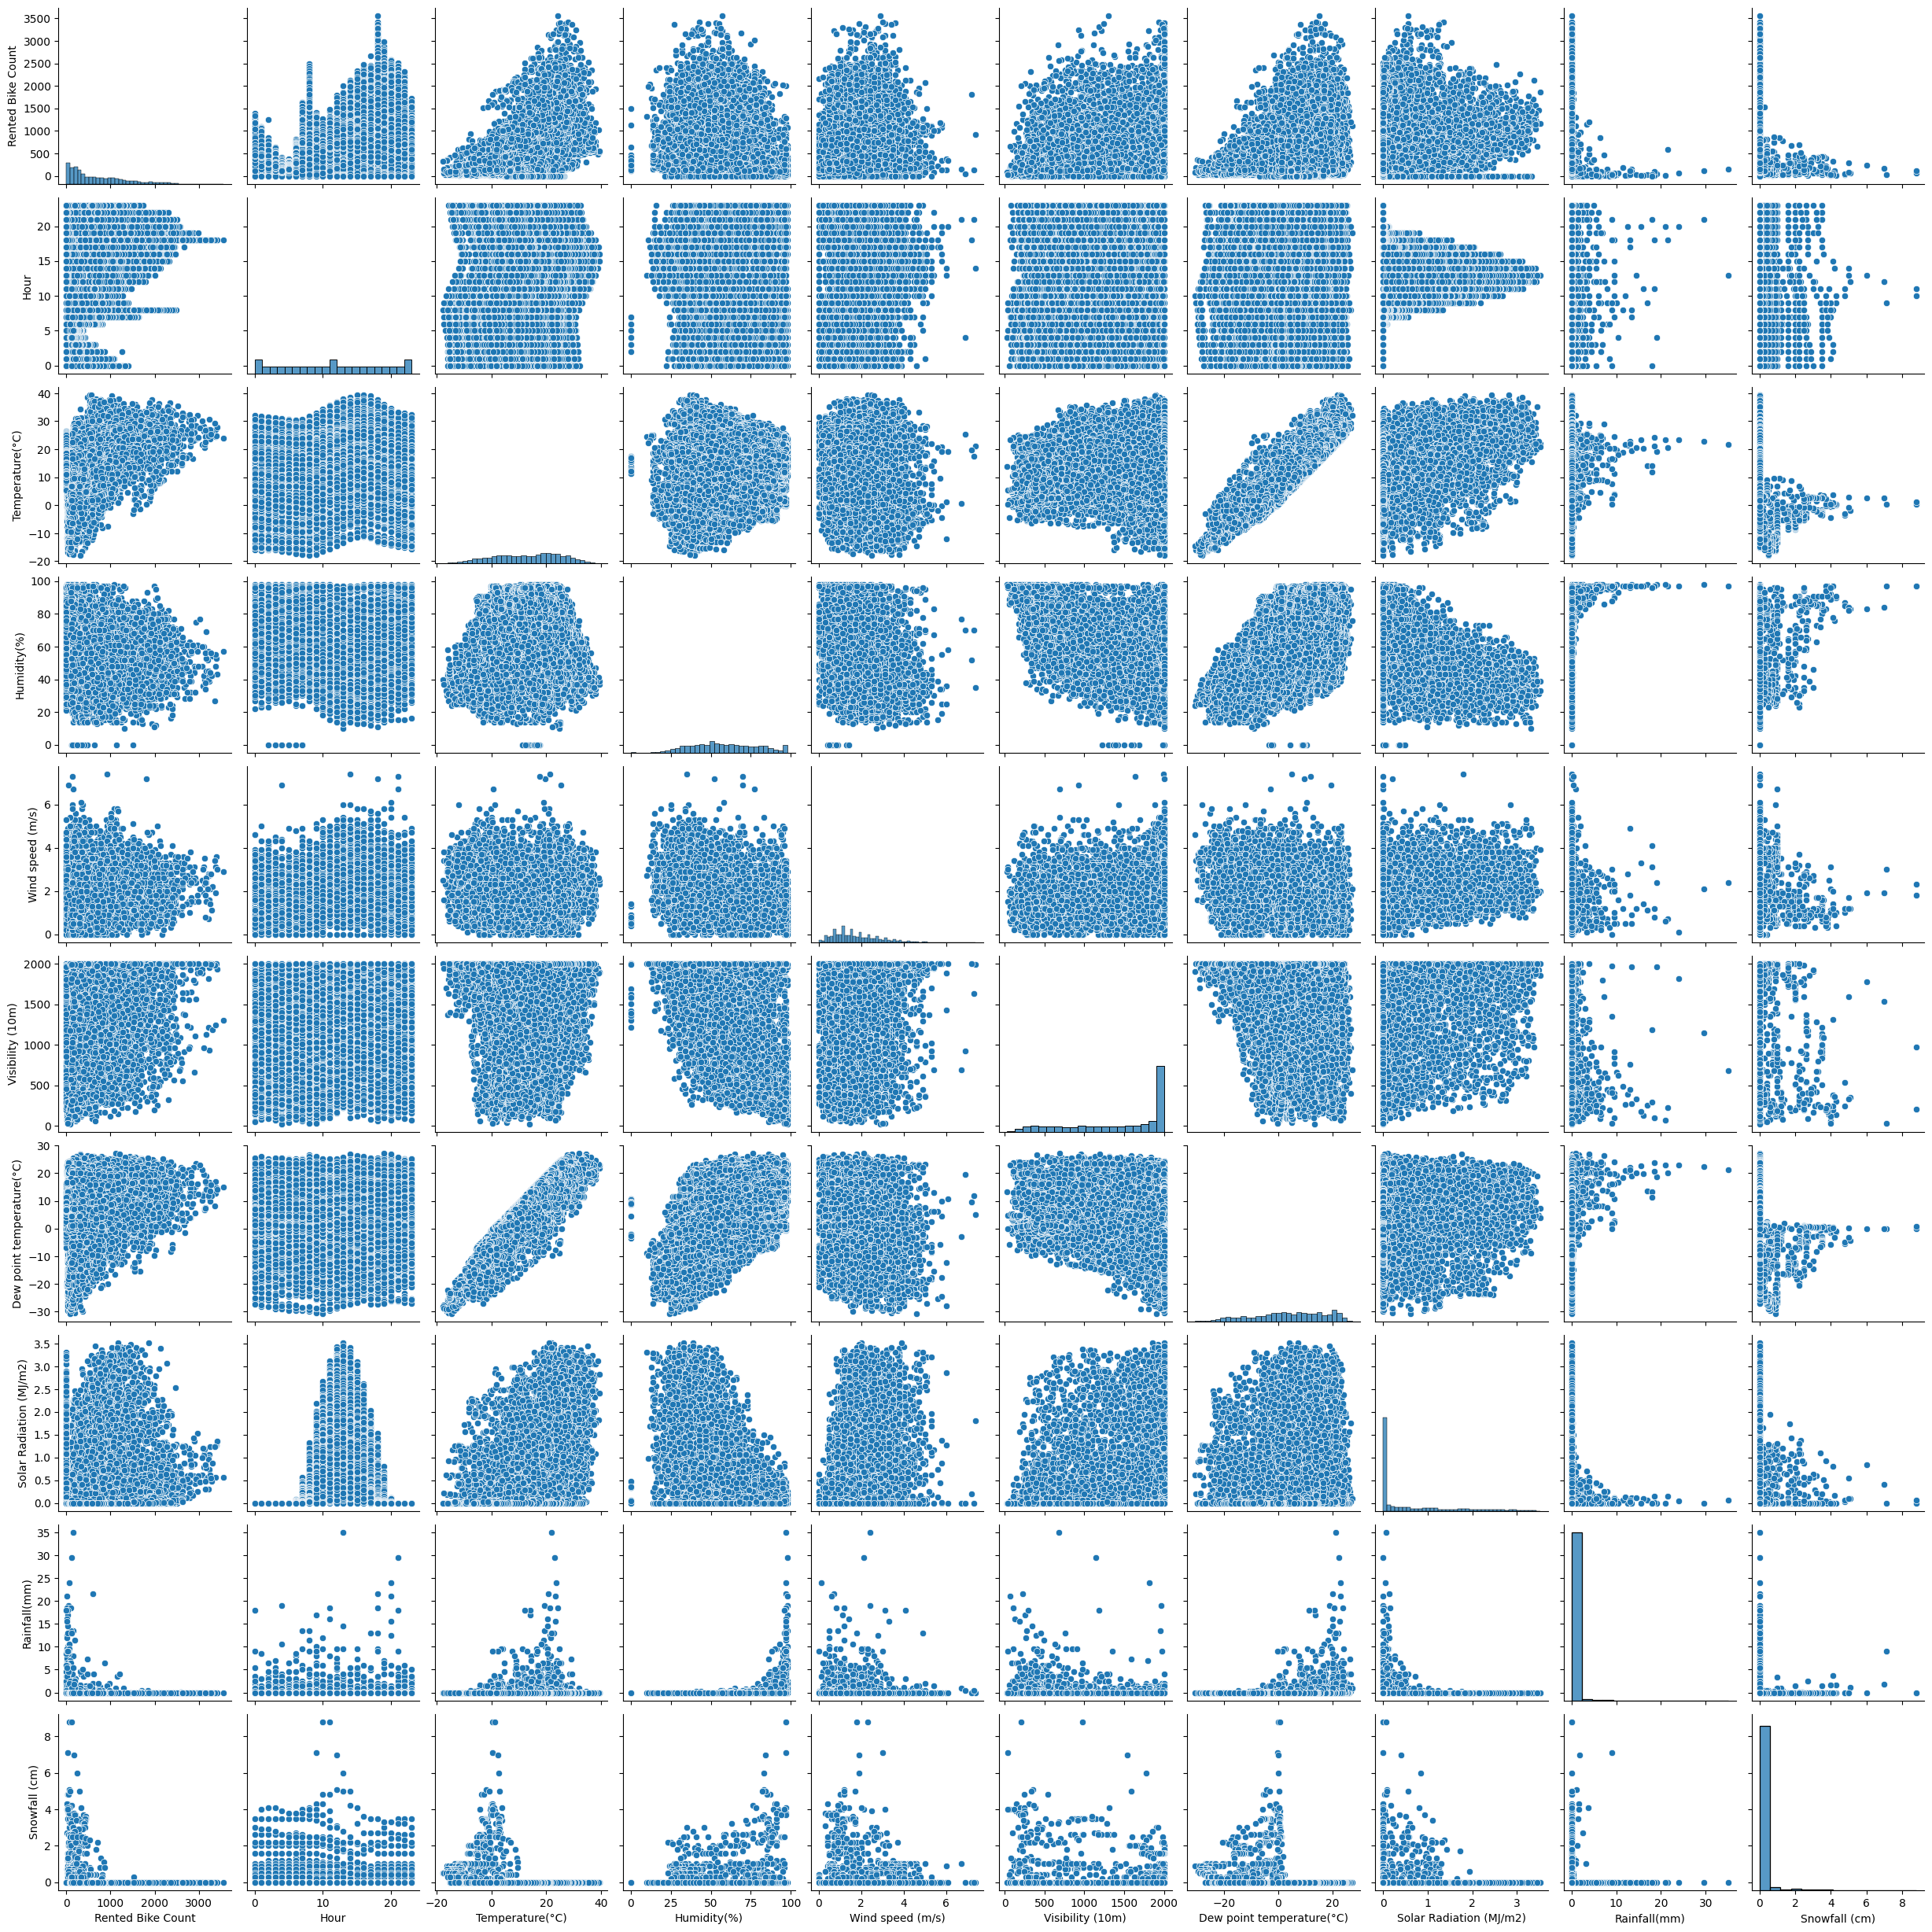

In [ ]:
# pair plot to check the colinearity
sns.pairplot(data)

As per above plot strong positive correlation between temperature and dew point temperature. This means as the temperature increases, the dew point temperature also increases and vice versa. This makes sense due to the physical relationship between temperature and moisture content in the air.

#Identifing predictor significance

In [ ]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    data["Rented Bike Count"],
    data[
        [
          "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              2863.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):                        0.00
Time:                        04:37:27   Log-Likelihood:                         -66909.
No. Observations:                8760   AIC:                                  1.338e+05
Df Residuals:                    8752   BIC:                                  1.339e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Temperature(°C)              66.9774      1.648     40.647      0.000      63.747      70.207
Humidity(%)                  -1.2248      0.196     -6.250      0.000      -1.609      -0.841
Wind speed (m/s)             55.1557      5.671      9.727      0.000      44.040      66.271
Visibility (10m)              0.0199      0.010      1.924      0.054      -0.000       0.040
Dew point temperature(°C)   -33.5953      1.530    -21.957      0.000     -36.595     -30.596
Solar Radiation (MJ/m2)    -123.2678      8.683    -14.196      0.000    -140.289    -106.246
Rainfall(mm)                -56.0617      4.903    -11.434      0.000     -65.672     -46.451
Snowfall (cm)                33.4346     12.815      2.609      0.009       8.314      58.555
==============================================================================
Omnibus:                      964.502   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1585.356
Skew:                           0.778   Prob(JB):                         0.00
Kurtosis:                       4.387   Cond. No.                     3.74e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Significant Predictors (p-value < 0.05):

Temperature(°C) (p-value ~ 0.000)
Humidity(%) (p-value ~ 0.000)
Wind speed (m/s) (p-value ~ 0.000)
Dew point temperature(°C) (p-value ~ 0.000)
Solar Radiation (MJ/m2) (p-value ~ 0.000)
Rainfall(mm) (p-value ~ 0.000)
Snowfall (cm) (p-value ~ 0.009)
Marginally Significant Predictor:

Visibility (10m) (p-value ~ 0.054)
Model Performance:

R-squared (uncentered): 0.724, indicating that the model explains about 72.4% of the variation in the bike count.
F-statistic: 2863, suggesting that the model as a whole is statistically significant.
Concerns:

Condition Number: The large condition number (3.74e+03) raises concerns about potential multicollinearity or other numerical problems. This could affect the stability of the coefficients and make interpretation less reliable.
Non-robust Covariance Type: The default "nonrobust" covariance type assumes that the errors are normally distributed and homoscedastic (constant variance). If these assumptions are violated, the standard errors and p-values might be unreliable.

#Building the Model
Train ,Validation and Test split

In [ ]:
from sklearn.model_selection import train_test_split

X = data[
    [
       "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"
    ]
]

y = data["Rented Bike Count"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

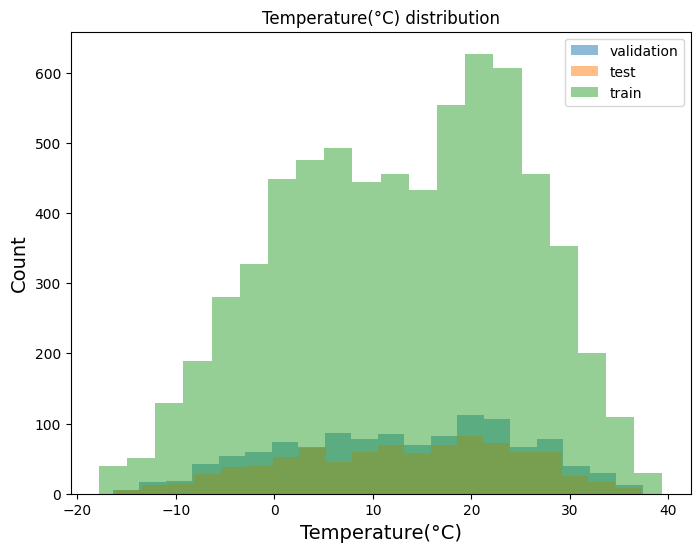

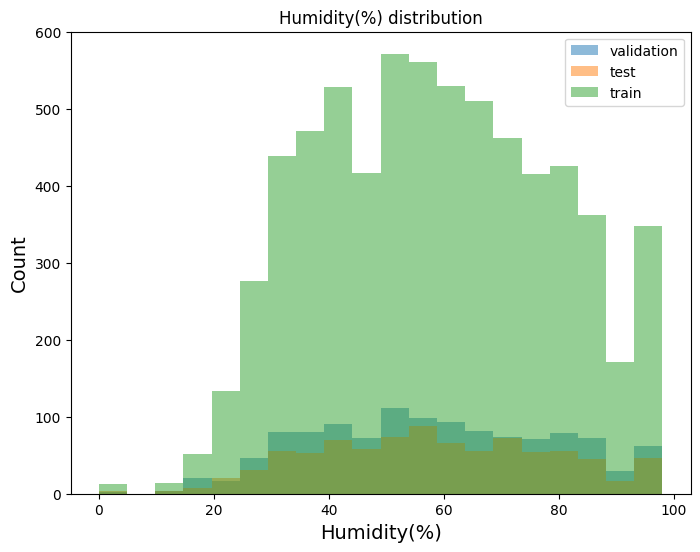

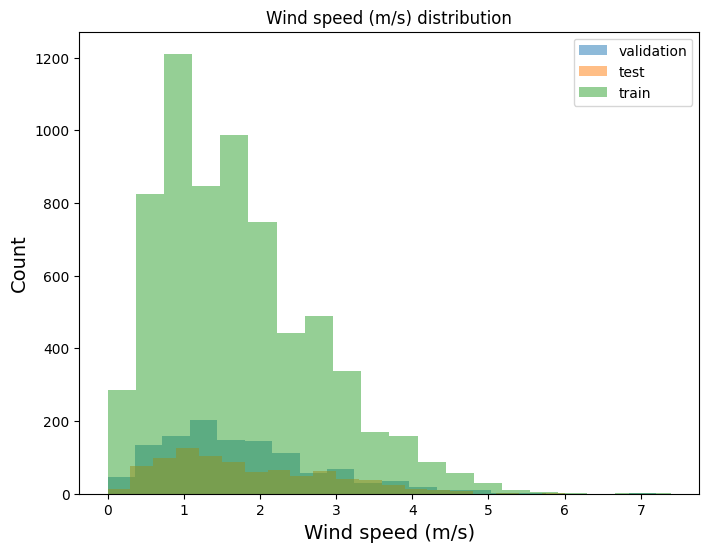

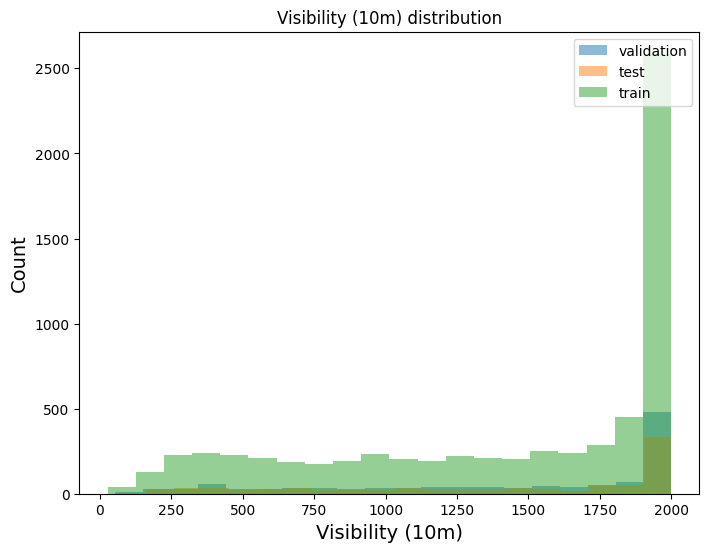

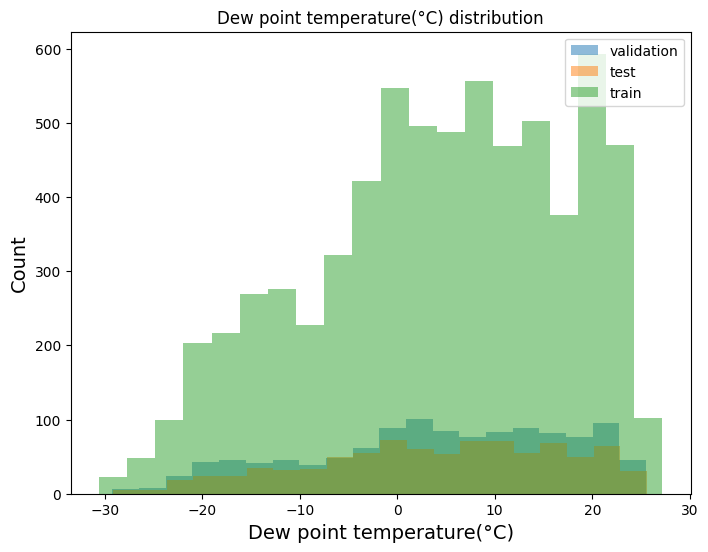

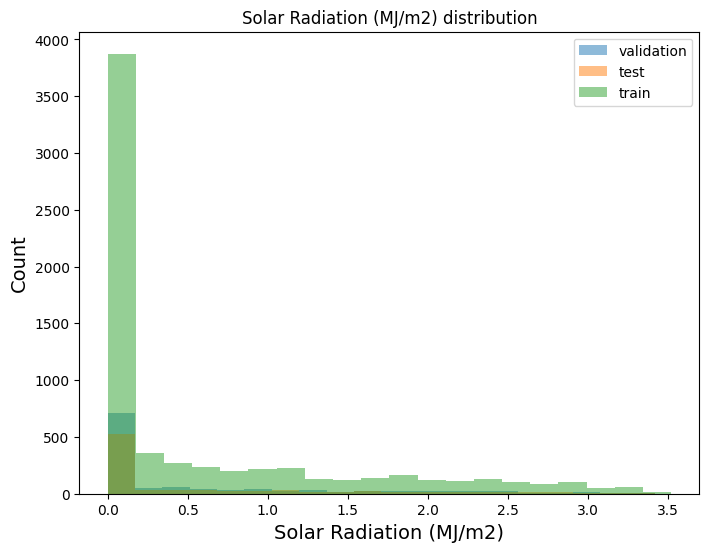

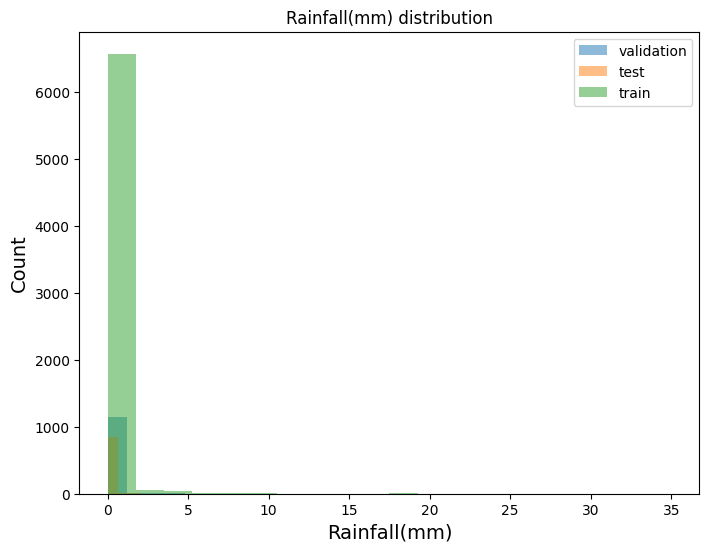

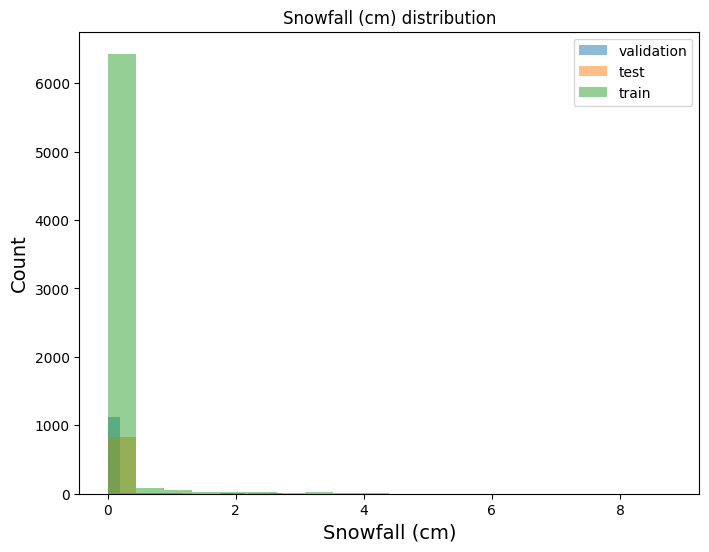

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
      "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"
    ]
]

X_val_plot = X_val[
    [
       "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"
    ]
]

X_train_plot = X_train[
    [
      "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

The division of dataset in Test, train and validation sets looks fine except few boundary values of
"Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"
 which appears to be missing in test and validation sets


#Linear Regression

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

#Making predictions

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 246314.47
Coefficient of determination: 0.40
R^2 score on tarining set = 0.4027329373427534


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 270508.69
Coefficient of determination: 0.38
R^2 score on test set = 0.37724448023881474


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 259595.36
Coefficient of determination: 0.39
R^2 score on validation set = 0.3853460052824156


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=0a2bb106393c02114a0ec17e1e26cac92a91edf13b794614a1f0a55f77e7a089
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


#Understanding the important features

In [ ]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

In [10]:
# Categorical or Numerical Coloumns
categorical_columns = [
    col for col in data.columns if data[col].dtype == "object"
]
print("Categorical Columns : ", categorical_columns)

categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in data.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['Date', 'Seasons', 'Holiday', 'Functioning Day']
Numerical Columns :  ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


the following conclusions can be drawn regarding the features and their importance in predicting the target variable (Rented Bike Count):

Temperature(°C): It has the highest positive impact on
the number of rented bikes, indicating that an increase in temperature is associated with higher bike rentals.

Humidity(%): While still important, it has a lower positive impact compared to temperature. This suggests that higher humidity is also associated with increased bike rentals, but to a lesser extent than temperature.

Solar Radiation (MJ/m2): This feature also has a positive impact, although significantly lower than temperature and humidity. It indicates that higher solar radiation is associated with a slight increase in bike rentals.

Rainfall(mm): The positive impact is even lower than solar radiation, suggesting that the presence of rainfall has a minimal effect on bike rentals.

Wind speed (m/s): Similar to rainfall, it has a low positive impact, indicating that higher wind speed is associated with a slight increase in bike rentals.

Dew point temperature(°C): This feature has a very low positive impact, suggesting that it has minimal influence on bike rentals.

Snowfall (cm): The impact is close to negligible, indicating that snowfall has almost no influence on bike rentals.

Visibility (10m): It has a slightly negative impact, suggesting that lower visibility is associated with a very slight decrease in bike rentals.



#Answer the following questions

###What are the data types? (Only numeric and categorical)

Categorical Columns :  ['Date', 'Seasons', 'Holiday', 'Functioning Day']
Numerical Columns :  ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


###Are there missing values?

There are no missing values.


###What are the likely distributions of the numeric variables?

The likely distributions of the numeric variables is normal distribution

###Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
To identify the useful independent variables for predicting the target variable (Rented Bike Count), methods such as correlation analysis, feature importance from machine learning models, and univariate selection are employed.
The strong correlations between "Rented Bike Count" and "Temperature(°C)", "Hour", and potentially "Dew point temperature(°C)" suggest these variables could be useful predictors in a model for bike rental demand

below analysis are done
Correlation Analysis:
Calculate the correlation between each independent variable and the target variable. Variables with a high absolute correlation coefficient (positive or negative) are considered more useful for prediction.
Feature Importance from Machine Learning Models:
Train a machine learning model, such as a random forest or gradient boosting model, and use the feature importance attribute to assess the importance of different features. Features with higher importance are more useful for prediction.
Univariate Selection:
Employ statistical tests, such as ANOVA for continuous variables or chi-squared test for categorical variables, to select features that have the strongest relationship with the target variable.

###Which independent variables have missing data? How much?
No independent variables have missing data.

###In the predictor variables independent of all the other predictor variables?
As per heatmap temperature is negatively affecting snowfall and rainfall.

###Which predictor variables are the most important?
The most important predictor variables are temperature and hours.

###Do the ranges of the predictor variables make sense?
Except some outlier most of the bike rented on high temperature. Hence the range of the predictor variables make sense.

###What are the distributions of the predictor variables?
Normal distribution is followed.

###Remove outliers and keep outliers (does if have an effect of the final predictive model)?
Since count of the rented bike is dependent on Temperature and hour removing outlier or keeping outlier does not effect final predictive model.


Tried to remove date but getting errors. using below code import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Randomly remove 1%, 5%, and 10% of the data
data_1percent = data.sample(frac=0.99)
data_5percent = data.sample(frac=0.95)
data_10percent = data.sample(frac=0.9)

# Identify numeric columns
numeric_cols = data.select_dtypes(include=["number"]).columns

# Create a new SimpleImputer object that only imputes numeric columns
imputer = SimpleImputer(strategy="mean", missing_values=np.nan)

# Impute missing values in numeric columns
imputed_data_1percent = pd.DataFrame(imputer.fit_transform(data_1percent[numeric_cols]), columns=numeric_cols)
imputed_data_5percent = pd.DataFrame(imputer.fit_transform(data_5percent[numeric_cols]), columns=numeric_cols)
imputed_data_10percent = pd.DataFrame(imputer.fit_transform(data_10percent[numeric_cols]), columns=numeric_cols)

# Concatenate imputed numeric columns with non-numeric columns
imputed_data_1percent = pd.concat([imputed_data_1percent, data_1percent.drop(numeric_cols, axis=1)], axis=1)
imputed_data_5percent = pd.concat([imputed_data_5percent, data_5percent.drop(numeric_cols, axis=1)], axis=1)
imputed_data_10percent = pd.concat([imputed_data_10percent, data_10percent.drop(numeric_cols, axis=1)], axis=1)
# Drop the 'Date' column from all imputed dataframes
imputed_data_1percent.drop('Date', axis=1, inplace=True)
imputed_data_5percent.drop('Date', axis=1, inplace=True)
imputed_data_10percent.drop('Date', axis=1, inplace=True)
# Assess the performance of the imputation method
# For example, train a model and evaluate the mean squared error
X_train, X_test, y_train, y_test = train_test_split(imputed_data_1percent.drop('Rented Bike Count', axis=1), imputed_data_1percent['Rented Bike Count'])
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Conclusion
From the analysis done above on the data set, it is clear that there is multicolinearity.

#Refernces
1)Sckit learn offcial documentation

2)Refered Towards Data Science

3)Eli5 official documentation
The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation

Copyright 2021 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.